In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 7 ##

## Census ##

The Census form asks respondents to provide the sex of each household member by checking one of two boxes labeled Male and Female. The SEX column contains numeric codes: 1 for male, 2 for female, and 0 for the total.


In [6]:
# As of August 2021, this census file is online here: 
data = 'http://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.csv'

# A description of the table appears online.
# https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.pdf

full_census_table = Table.read_table(data)
#full_census_table.sort('SEX', descending = True)
#full_census_table.group('SEX')

full_census_table


SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,0,3944153,3944160,3951430,3963092,3926570,3931258,3954787,3983981,3954773,3893990,3815343,3783052
0,1,3978070,3978090,3957730,3966225,3977549,3942698,3948891,3973133,4002903,3972711,3908830,3829599
0,2,4096929,4096939,4090621,3970654,3978925,3991740,3958711,3966321,3991349,4020045,3987032,3922044
0,3,4119040,4119051,4111688,4101644,3981531,3991017,4005928,3974351,3982984,4006946,4033038,3998665
0,4,4063170,4063186,4077346,4121488,4111490,3992502,4004032,4020292,3989750,3997280,4018719,4043323
0,5,4056858,4056872,4064521,4087054,4131049,4121876,4004576,4017589,4035033,4003452,4008443,4028281
0,6,4066381,4066412,4072904,4074531,4096631,4141126,4133372,4017388,4031568,4048018,4014057,4017227
0,7,4030579,4030594,4042990,4082821,4084175,4106756,4152666,4145872,4030888,4044139,4058370,4022319
0,8,4046486,4046497,4025501,4052773,4092559,4094513,4118349,4165033,4158848,4042924,4054236,4066194
0,9,4148353,4148369,4125312,4035319,4062726,4103052,4106068,4130887,4177895,4170813,4053179,4061874


In [7]:
# Keep only the columns we care about
partial_census_table = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019')
partial_census_table

SEX,AGE,POPESTIMATE2014,POPESTIMATE2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323
0,5,4004576,4028281
0,6,4133372,4017227
0,7,4152666,4022319
0,8,4118349,4066194
0,9,4106068,4061874


In [8]:
# Make things easier to read
us_pop = partial_census_table.relabeled('POPESTIMATE2014', '2014').relabeled('POPESTIMATE2019', '2019')
us_pop

SEX,AGE,2014,2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323
0,5,4004576,4028281
0,6,4133372,4017227
0,7,4152666,4022319
0,8,4118349,4066194
0,9,4106068,4061874


In [9]:
# Sort by age
us_pop.sort('AGE')

SEX,AGE,2014,2019
0,0,3954787,3783052
1,0,2024511,1935117
2,0,1930276,1847935
0,1,3948891,3829599
1,1,2018511,1958585
2,1,1930380,1871014
0,2,3958711,3922044
1,2,2023752,2005544
2,2,1934959,1916500
0,3,4005928,3998665


In [10]:
# Sort by age (another way)
us_pop.sort('AGE', descending=True)

SEX,AGE,2014,2019
0,999,318301008,328239523
1,999,156654424,161657324
2,999,161646584,166582199
0,100,70685,100322
1,100,13577,23472
2,100,57108,76850
0,99,41277,57124
1,99,9032,14596
2,99,32245,42528
0,98,59546,86150


## Sex Ratios

In [11]:
# let's look at the 2019 population estimate
# for males and females combined, males only, and females only
us_pop_2019 = us_pop.drop('2014')
all_ages = us_pop_2019.where('AGE', are.equal_to(999))
all_ages

SEX,AGE,2019
0,999,328239523
1,999,161657324
2,999,166582199


In [12]:
# let's add a proportin column
# to view the proportion of males and females in the total population

pop_2019 = all_ages.column('2019').item(0)
all_ages.with_column(
    'Proportion', all_ages.column('2019')/pop_2019
).set_format('Proportion', PercentFormatter)

SEX,AGE,2019,Proportion
0,999,328239523,100.00%
1,999,161657324,49.25%
2,999,166582199,50.75%


In [13]:
# let's go back to the us_pop_2019 table
# and find all infants (less than 1 year old)
infants = us_pop_2019.where('AGE', are.equal_to(0))
infants

SEX,AGE,2019
0,0,3783052
1,0,1935117
2,0,1847935


In [15]:
# find all teens in the 2019 table: 13-19 years old
teens = us_pop_2019.where('AGE', are.between_or_equal_to(13,19))
teens.sort('AGE', descending = True)


SEX,AGE,2019
0,19,4330439
1,19,2214784
2,19,2115655
0,18,4255827
1,18,2172385
2,18,2083442
0,17,4142425
1,17,2112553
2,17,2029872
0,16,4150420


In [16]:
# let's add a proportion column 
# which calculates the percentage of male and female infants in the population
infants_2019 = infants.column('2019').item(0)
infants.with_column(
    'Proportion', infants.column('2019')/infants_2019
).set_format('Proportion', PercentFormatter)

SEX,AGE,2019,Proportion
0,0,3783052,100.00%
1,0,1935117,51.15%
2,0,1847935,48.85%


In [17]:
# all the females in our us_pop_2019 table
females_all_rows = us_pop_2019.where('SEX', are.equal_to(2))
females = females_all_rows.where('AGE', are.not_equal_to(999))
females

SEX,AGE,2019
2,0,1847935
2,1,1871014
2,2,1916500
2,3,1955655
2,4,1976372
2,5,1967081
2,6,1964271
2,7,1966584
2,8,1986471
2,9,1988726


In [18]:
#all males in us_pop_2019
males_all_rows = us_pop_2019.where('SEX', are.equal_to(1))
males = males_all_rows.where('AGE', are.not_equal_to(999))
males

SEX,AGE,2019
1,0,1935117
1,1,1958585
1,2,2005544
1,3,2043010
1,4,2066951
1,5,2061200
1,6,2052956
1,7,2055735
1,8,2079723
1,9,2073148


In [ ]:
# instead of proportion, what if we want to measure the 
# ratio of female to male?

In [19]:
males.column('AGE')

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [20]:
females.column('AGE')

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [21]:
# Ratio table of Female to Male
ratios = Table().with_columns(
    'AGE', females.column('AGE'),
    '2019 F:M RATIO', females.column('2019')/males.column('2019')
)
ratios

AGE,2019 F:M RATIO
0,0.954947
1,0.955289
2,0.955601
3,0.957242
4,0.956177
5,0.954338
6,0.956801
7,0.956633
8,0.955161
9,0.959278


In [22]:
ratios.where('AGE', are.above(75)).show()
# what do you notice?

AGE,2019 F:M RATIO
76,1.21422
77,1.23558
78,1.26373
79,1.28129
80,1.29209
81,1.32745
82,1.36101
83,1.39749
84,1.44603
85,1.48588


In [23]:
males.where('AGE', are.contained_in(make_array(92, 93, 99)))

SEX,AGE,2019
1,92,131684
1,93,103415
1,99,14596


In [24]:
females.where('AGE', are.contained_in(make_array(92, 93, 99)))

SEX,AGE,2019
2,92,262383
2,93,217370
2,99,42528


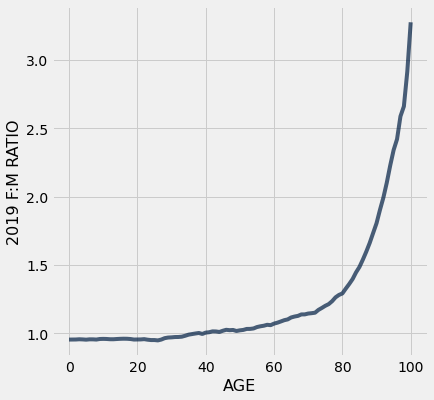

In [25]:
ratios.plot('AGE')


In [ ]:
# in a sentence or two, describe the relationship between age 
# and the ratio of Female:Male in the 2019 population estimate



## Line Plots ##

In [26]:
us_pop

SEX,AGE,2014,2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323
0,5,4004576,4028281
0,6,4133372,4017227
0,7,4152666,4022319
0,8,4118349,4066194
0,9,4106068,4061874


In [27]:
# Remove the age totals
no_999 = us_pop.where('AGE', are.below(999))
no_999.sort('AGE', descending = True)

SEX,AGE,2014,2019
0,100,70685,100322
1,100,13577,23472
2,100,57108,76850
0,99,41277,57124
1,99,9032,14596
2,99,32245,42528
0,98,59546,86150
1,98,13659,23543
2,98,45887,62607
0,97,82948,116969


In [28]:
# Remove male and female (keep only combined)
everyone = no_999.where('SEX', 0).drop('SEX')

In [29]:
everyone

AGE,2014,2019
0,3954787,3783052
1,3948891,3829599
2,3958711,3922044
3,4005928,3998665
4,4004032,4043323
5,4004576,4028281
6,4133372,4017227
7,4152666,4022319
8,4118349,4066194
9,4106068,4061874


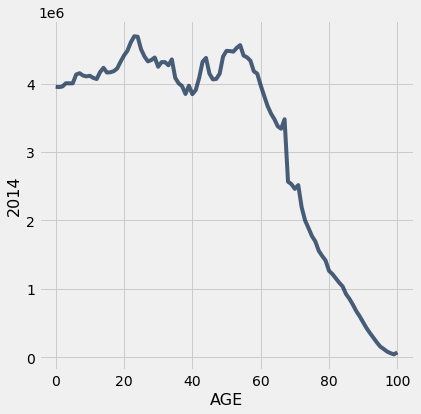

In [30]:
everyone.plot('AGE', '2014')

In [ ]:
# ^^ That plot should be labeled! Here are 3 ways to label it:

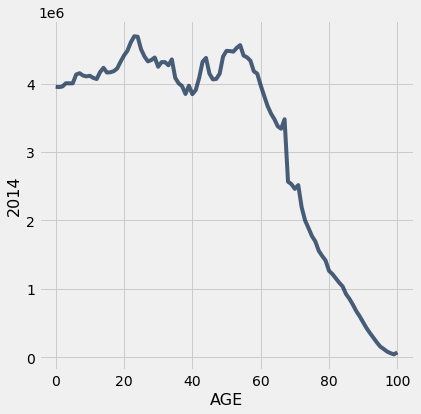

In [31]:
# US Population  <--- Just add a comment

everyone.plot('AGE', '2014')

US Population


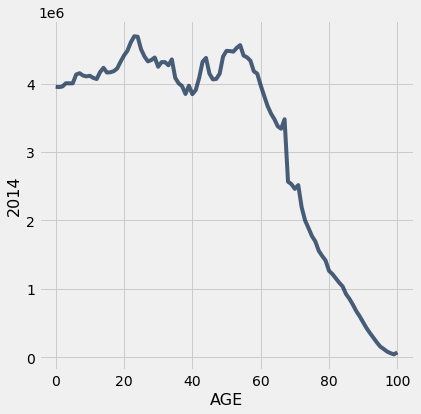

In [32]:
everyone.plot('AGE', '2014')
print('US Population')  # <--- Print out what it is

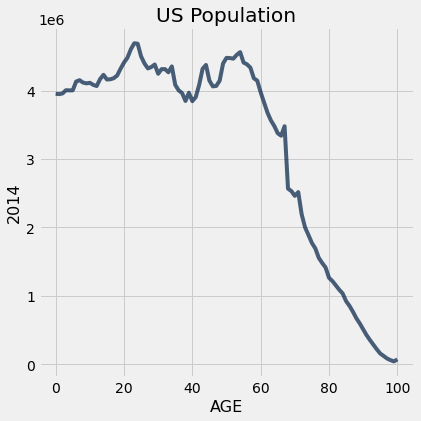

In [33]:
everyone.plot('AGE', '2014')
plots.title('US Population');    # <--- OPTIONAL; not needed for DS1

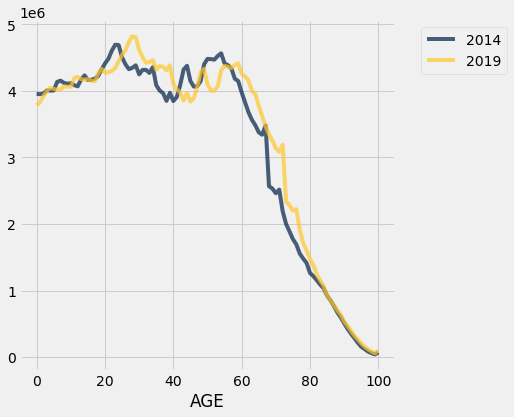

In [34]:
# Age distribution for two different years
everyone.plot('AGE')

In [35]:
everyone

AGE,2014,2019
0,3954787,3783052
1,3948891,3829599
2,3958711,3922044
3,4005928,3998665
4,4004032,4043323
5,4004576,4028281
6,4133372,4017227
7,4152666,4022319
8,4118349,4066194
9,4106068,4061874


## Males and Females in 2019 ##

In [ ]:
# Let's compare male and female counts per age
males = no_999.where('SEX', 1).drop('SEX')
females = no_999.where('SEX', 2).drop('SEX')

In [ ]:
pop_2019 = Table().with_columns(
    'Age', males.column('AGE'),
    'Males', males.column('2019'),
    'Females', females.column('2019')
)
pop_2019

In [ ]:
pop_2019.plot('Age')

In [ ]:
# Calculate the percent female for each age
total = pop_2019.column('Males') + pop_2019.column('Females')
pct_female = pop_2019.column('Females') / total * 100
pct_female

In [ ]:
# Round it to 3 so that it's easier to read
pct_female = np.round(pct_female, 3)
pct_female

In [ ]:
# Add female percent to our table
pop_2019 = pop_2019.with_column('Percent female', pct_female)
pop_2019

In [ ]:
pop_2019.plot('Age', 'Percent female')

In [ ]:
# ^^ Look at the y-axis! Trend is not as dramatic as you might think
pop_2019.plot('Age', 'Percent female')
plots.ylim(0, 100);  # Optional for DS 1

## Scatter Plots ##

In [36]:
# Actors and their highest grossing movies
actors = Table.read_table('data/actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


In [40]:
actors.where('Total Gross', are.above(4500))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4


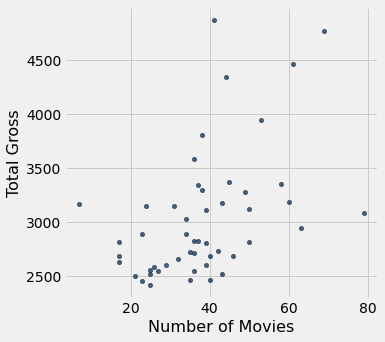

In [37]:
actors.scatter('Number of Movies', 'Total Gross')

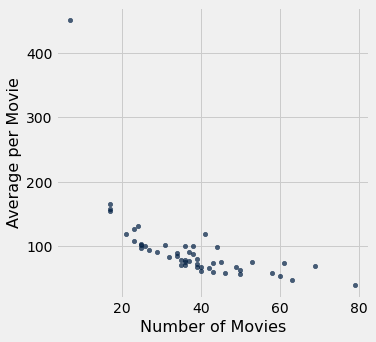

In [41]:
actors.scatter('Number of Movies', 'Average per Movie')

In [42]:
actors.where('Average per Movie', are.above(400))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


In [44]:
# find Anthony Hopkins
actors.sort('Actor')

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Adam Sandler,2661,32,83.2,Hotel Transylvania 2,169.7
Andy Serkis,2890.6,23,125.7,Star Wars: The Force Awakens,936.7
Anne Hathaway,2416.5,25,96.7,The Dark Knight Rises,448.1
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7
Ben Stiller,2827,37,76.4,Meet the Fockers,279.3
Brad Pitt,2680.9,40,67,World War Z,202.4
Bradley Cooper,2557.7,25,102.3,American Sniper,350.1
Bruce Willis,3189.4,60,53.2,Sixth Sense,293.5
Cameron Diaz,3031.7,34,89.2,Shrek 2,441.2
Cate Blanchett,2802.6,39,71.9,Return of the King,377.8


## Bar Charts ##

In [45]:
# Highest grossing movies as of 2017
top_movies = Table.read_table('data/top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [46]:
top10_adjusted = top_movies.take(np.arange(10))
top10_adjusted

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [47]:
# Convert to millions of dollars for readability
millions = np.round(top10_adjusted.column('Gross (Adjusted)') / 1000000, 3)
top10_adjusted = top10_adjusted.with_column('Millions', millions)
top10_adjusted

Title,Studio,Gross,Gross (Adjusted),Year,Millions
Gone with the Wind,MGM,198676459,1796176700,1939,1796.18
Star Wars,Fox,460998007,1583483200,1977,1583.48
The Sound of Music,Fox,158671368,1266072700,1965,1266.07
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,1261.09
Titanic,Paramount,658672302,1204368000,1997,1204.37
The Ten Commandments,Paramount,65500000,1164590000,1956,1164.59
Jaws,Universal,260000000,1138620700,1975,1138.62
Doctor Zhivago,MGM,111721910,1103564200,1965,1103.56
The Exorcist,Warner Brothers,232906145,983226600,1973,983.227
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,969.01


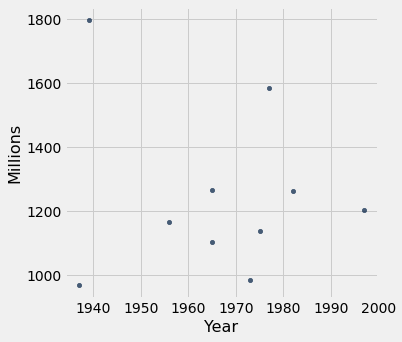

In [50]:
# A line plot doesn't make sense here: don't do this!
top10_adjusted.scatter('Year', 'Millions')

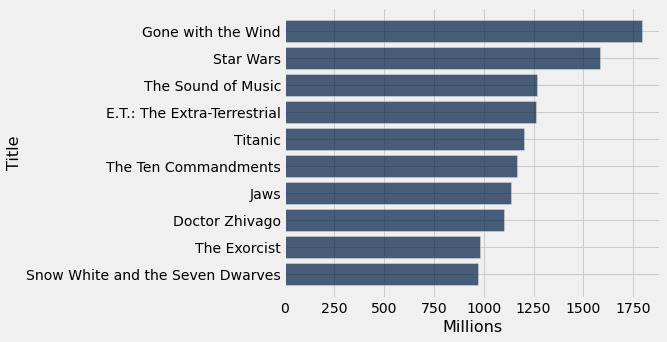

In [49]:
top10_adjusted.barh('Title', 'Millions')

In [ ]:
# Generate the chart shown in the slides:
# bar chart of age (# years since release) for the 10 highest grossing movies (non-adjusted)



